In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [97]:
df =  pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
# Checking for null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [27]:
# Checking the count of each unique values in categorical columns
print(df.dtypes['sex'])
for i in df.columns:
  if df.dtypes[i]==object:
    print(df[i].value_counts())

object
sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


## Exploratory Data Analysis

In [91]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Numerical Columns

<Figure size 400x400 with 0 Axes>

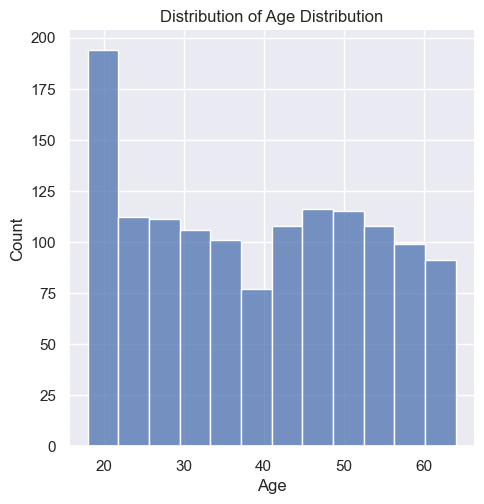

In [70]:
# Age Column
plt.figure(figsize=(4,4))
sns.displot(df['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age Distribution')
plt.show()

<Figure size 400x400 with 0 Axes>

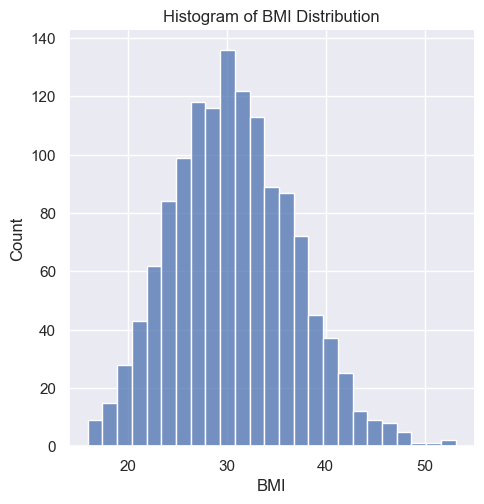

In [71]:
#BMI Column
plt.figure(figsize=(4,4))
sns.displot(df['bmi'])
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('Histogram of BMI Distribution')
plt.show()

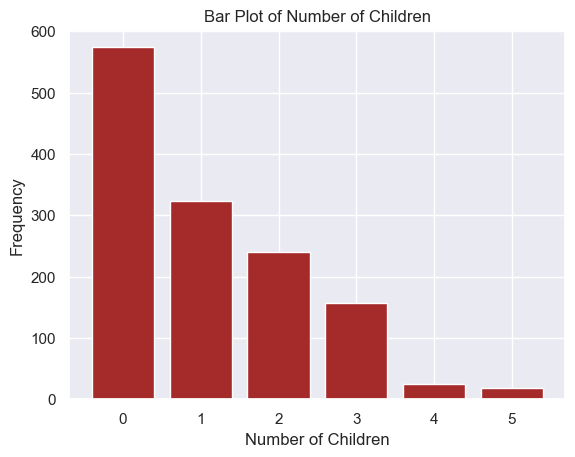

In [73]:
#Children Column
# Get unique values and their counts
unique_values, counts = np.unique(df['children'], return_counts=True)

# Plotting the bar chart
plt.bar(unique_values, counts, color='brown')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.title('Bar Plot of Number of Children')
plt.show()

### Categorical Columns

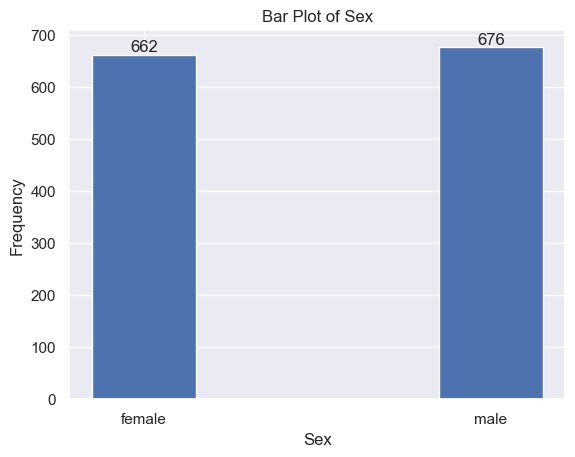

In [89]:
# Sex column
# Get unique values and their counts
unique_values, counts = np.unique(df['sex'], return_counts=True)

# Plotting the bar chart
bars = plt.bar(unique_values, counts,width=0.3)
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.title('Bar Plot of Sex')
plt.xticks(unique_values)  # Optional: If you want to label the x-axis with 'Male' and 'Female'
# Annotate each bar with its count
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count), ha='center', va='bottom')
plt.show()

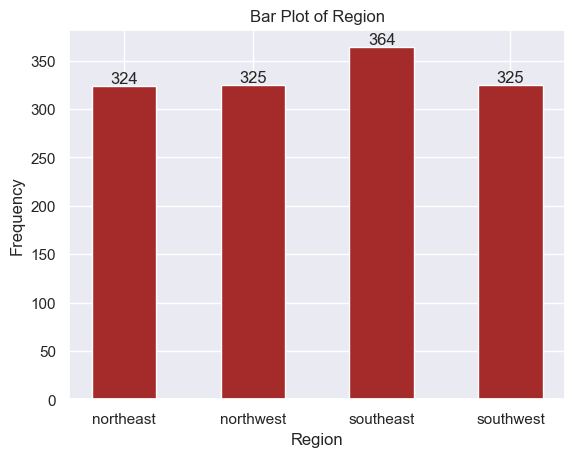

In [82]:
# Region Column
# Get unique values and their counts
unique_values, counts = np.unique(df['region'], return_counts=True)

# Plotting the bar chart
bars = plt.bar(unique_values, counts, color='brown',width=0.5)
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.title('Bar Plot of Region')
plt.xticks(unique_values)  # Optional: If you want to label the x-axis with 'Male' and 'Female'
# Annotate each bar with its count
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count), ha='center', va='bottom')
plt.show()

In [129]:
df =  pd.read_csv('insurance.csv')

In [130]:
import joblib
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()
df['sex_encoded'] = label_encoder.fit_transform(df['sex'])
df['smoker_encoded'] = label_encoder.fit_transform(df['smoker'])

## Encoding Classes
- Sex (female-0, male-1)
- Smoker (yes-1,no-0)

In [131]:
df.head()

,age,sex,bmi,children,smoker,region,charges,sex_encoded,smoker_encoded
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [132]:
# Extract the 'region' column as a 2D array
regions = df[['region']]

# Initialize the OneHotEncoder
region_encoder = OneHotEncoder()

# Fit and transform the data
encoded_regions = region_encoder.fit_transform(regions)

# Convert the sparse matrix to a DataFrame
encoded_df = pd.DataFrame(encoded_regions.toarray(), columns=region_encoder.get_feature_names_out(['region']))

# Concatenate the original DataFrame with the encoded DataFrame
encoded_df = pd.concat([df.drop(columns=['region','sex','smoker']), encoded_df], axis=1)

print(encoded_df)

      age     bmi  children      charges  sex_encoded  smoker_encoded  \
0      19  27.900         0  16884.92400            0               1   
1      18  33.770         1   1725.55230            1               0   
2      28  33.000         3   4449.46200            1               0   
3      33  22.705         0  21984.47061            1               0   
4      32  28.880         0   3866.85520            1               0   
...   ...     ...       ...          ...          ...             ...   
1333   50  30.970         3  10600.54830            1               0   
1334   18  31.920         0   2205.98080            0               0   
1335   18  36.850         0   1629.83350            0               0   
1336   21  25.800         0   2007.94500            0               0   
1337   61  29.070         0  29141.36030            0               1   

      region_northeast  region_northwest  region_southeast  region_southwest  
0                  0.0               0.0    

In [133]:
encoded_df.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_encoded', 'smoker_encoded',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')

In [136]:
encoded_df.head()

,age,bmi,children,charges,sex_encoded,smoker_encoded,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,1,0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,1,0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,1,0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,1,0,0.0,1.0,0.0,0.0


In [139]:
X = encoded_df.drop(columns=['charges'])
y = encoded_df['charges']

In [140]:
X

,age,bmi,children,sex_encoded,smoker_encoded,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0.0,0.0,0.0,1.0
1,18,33.770,1,1,0,0.0,0.0,1.0,0.0
2,28,33.000,3,1,0,0.0,0.0,1.0,0.0
3,33,22.705,0,1,0,0.0,1.0,0.0,0.0
4,32,28.880,0,1,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,0.0,1.0,0.0,0.0
1334,18,31.920,0,0,0,1.0,0.0,0.0,0.0
1335,18,36.850,0,0,0,0.0,0.0,1.0,0.0
1336,21,25.800,0,0,0,0.0,0.0,0.0,1.0


In [141]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [145]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 9) (896, 9) (442, 9)


In [146]:
print(X.shape,X_test.shape,y_test.shape)

(1338, 9) (442, 9) (442,)


In [178]:
model =  RandomForestRegressor(n_estimators=20,max_depth=5)
model.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, n_estimators=20)

In [179]:
y_pred = model.predict(X_test)

In [180]:
from sklearn.metrics import r2_score
# Evaluating the model
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.8559035941332112


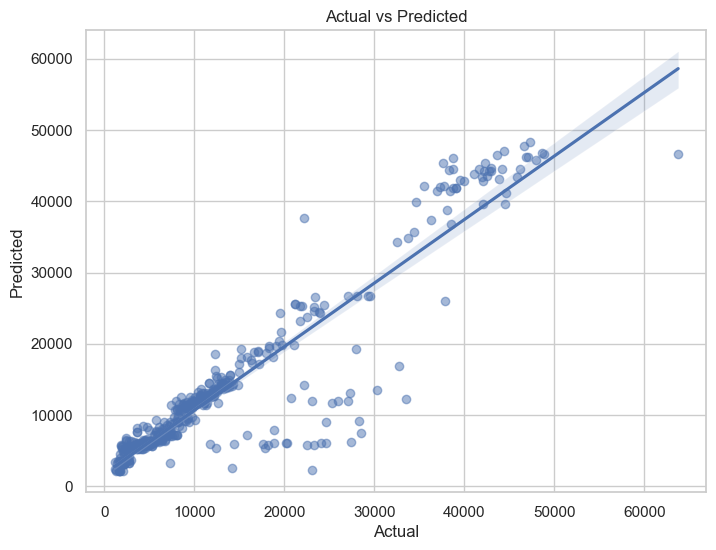

In [185]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Set the style of the plot
sns.set_theme(style="whitegrid")

# Create a scatter plot with a regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='Actual', y='Predicted', data=results_df, scatter_kws={'alpha':0.5})
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [196]:
import pickle as pkl
pkl.dump(model,open('MIP.pkl','wb'))

In [ ]:
model.predict([])